In [98]:
import numpy as np
from pandas import Series, DataFrame, date_range
from pandas.tseries.offsets import MonthEnd
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')
import seaborn as sns
import random
import math 


import datetime
plt.rc('figure', figsize=(12, 10))
from numpy.linalg import inv
from numpy import dot
from scipy import stats

In [99]:
DF = pd.read_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD Project Area\Data\BRD Monitoring - for analysis.xls')

In [100]:
DF['Date'] = pd.to_datetime(DF.Date.astype('str'))
DF = DF.set_index('Date')
DF.head()

,Time,Latitude,Longitude,Data Type,Species,Sex,Age,Activity,Data Type.1,Site,...,Wind Direction,Humidity - Start,Cloud Cover - Start,GenVegConOther - Note,Other Comments,Range (meters),Bearing (degrees),Inclination (degrees),Record Type,Behaviour
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-12,13:36:50,-31.316560,142.329812,Real Data,NaN,NaN,NaN,SEARCH Transect,Start Transect,Mutawintji NP,...,NaN,NaN,NaN,NaN,Old Mutawintji Gorge - Added post field survey...,NaN,NaN,NaN,Start Transect,NaN
2013-07-12,13:38:48,-31.314617,142.335820,Real Data,NaN,NaN,NaN,SEARCH Transect,End Transect,Mutawintji NP,...,NaN,NaN,NaN,NaN,Old Mutwintji Gorge - Record added later due t...,NaN,NaN,NaN,End Transect,NaN
2013-12-06,14:26:49,-31.256820,142.293442,Real Data,Ctenophorus mirrityana,Male,Adult,POP Transect,Transect Record,Mutawintji NP,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Transect Record,Rest
2013-12-06,15:22:17,-31.289618,142.296615,Real Data,Ctenophorus mirrityana,Unknown,Juvenile,POP Transect,Transect Record,Mutawintji NP,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Transect Record,Rest
2013-12-06,15:47:48,-31.292693,142.298810,Real Data,Ctenophorus mirrityana,Unknown,Juvenile,POP Transect,Transect Record,Mutawintji NP,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Transect Record,Rest


In [101]:
DF1= DF.drop(['Data Type', 'Wind Direction', 'GenVegConOther - Note', 'Cloud Cover - Start', 'Observer - Start', 
               'Observers', 'Wind Speed - Start', 'Other Comments', 'Record Type'], axis = 1)

In [102]:
DF1['Type'] = DF1['Data Type.1']

In [103]:
DF1 = DF1.drop(['Data Type.1'], axis = 1)

In [104]:
DF1 = DF1[(DF1.Type == "Transect Record")]

In [105]:
DF1 = DF1[(DF1.Activity == "POP Transect")]

In [106]:
DF2 = DF1[(DF1.Species == "Ctenophorus mirrityana")]

In [107]:
DF2['Bearing'] = DF2['Bearing (degrees)']
DF2['Range'] = DF2 ['Range (meters)']
DF2 = DF2.drop(['Trans. Bearing (degrees)', 'Bearing (degrees)', 'Range (meters)'], axis = 1)
DF2.replace('', np.nan, inplace=True)
DF2.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Latitude,Longitude,Transect Number,Temperature - Start,Humidity - Start,Inclination (degrees),Bearing,Range
count,217.000000,217.000000,131.000000,55.000000,55.000000,2.000000,125.000000,125.000000
mean,-31.547445,141.604748,3.893130,29.320000,29.252727,17.625000,174.408000,9.473600
std,0.183793,0.426717,5.488802,3.294462,12.260020,24.571961,114.955819,8.153647
min,-31.666780,141.325057,1.000000,21.600000,19.800000,0.250000,0.000000,1.000000
25%,-31.663143,141.335053,1.000000,27.950000,20.800000,8.937500,55.000000,4.900000
50%,-31.659622,141.336483,3.000000,31.100000,25.900000,17.625000,190.000000,8.000000
75%,-31.290993,142.271282,4.000000,31.500000,35.000000,26.312500,280.000000,10.400000
max,-31.217630,142.307448,29.000000,32.700000,75.300000,35.000000,355.000000,55.000000


In [108]:
DF2.head()

,Time,Latitude,Longitude,Species,Sex,Age,Activity,Site,Transect Number,Temperature - Start,Humidity - Start,Inclination (degrees),Behaviour,Type,Bearing,Range
Date,,,,,,,,,,,,,,,,
2013-12-06,14:26:49,-31.256820,142.293442,Ctenophorus mirrityana,Male,Adult,POP Transect,Mutawintji NP,9.0,NaN,NaN,NaN,Rest,Transect Record,NaN,NaN
2013-12-06,15:22:17,-31.289618,142.296615,Ctenophorus mirrityana,Unknown,Juvenile,POP Transect,Mutawintji NP,1.0,NaN,NaN,NaN,Rest,Transect Record,NaN,NaN
2013-12-06,15:47:48,-31.292693,142.298810,Ctenophorus mirrityana,Unknown,Juvenile,POP Transect,Mutawintji NP,1.0,NaN,NaN,NaN,Rest,Transect Record,NaN,NaN
2013-12-06,16:13:53,-31.293548,142.299505,Ctenophorus mirrityana,Male,Adult,POP Transect,Mutawintji NP,2.0,NaN,NaN,NaN,Display,Transect Record,NaN,NaN
2013-12-06,14:38:36,-31.256922,142.292819,Ctenophorus mirrityana,Female,Adult,POP Transect,Mutawintji NP,9.0,NaN,NaN,NaN,Rest,Transect Record,NaN,NaN


In [109]:
DF2.tail()
DFori = DF2
DFMutawintji2 = DF2[(DF2.Site == "Mutawintji NP")]
DFPurnamoota2 = DF2[(DF2.Site == "Purnamoota")]

In [110]:
DF2 = DF2.dropna(subset=['Transect Number'])

categorical_features = ["Transect Number", "Site"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(DFori[categorical_features]):
    DFori[categorical_feature].value_counts().plot(kind='bar', ax=ax[i]).set_title(categorical_feature)
fig.show()

In [111]:
#DFori['Transect Number'].value_counts().plot(kind='bar')

In [112]:
#DFori['Site'].value_counts().plot(kind='bar')

In [113]:
DFPurnamoota = DFori[(DFori.Site == "Purnamoota")]

In [114]:
DFPurnamoota.describe()

,Latitude,Longitude,Transect Number,Temperature - Start,Humidity - Start,Inclination (degrees),Bearing,Range
count,156.000000,156.000000,89.000000,36.000000,36.000000,0.0,88.000000,88.000000
mean,-31.661609,141.338599,2.258427,29.505556,27.458333,NaN,165.181818,9.780682
std,0.003313,0.009020,1.092621,3.166516,8.615845,NaN,116.618599,8.850415
min,-31.666780,141.325057,1.000000,23.500000,19.800000,NaN,0.000000,1.000000
25%,-31.664567,141.334546,1.000000,29.825000,20.800000,NaN,54.500000,4.950000
50%,-31.661069,141.335547,2.000000,31.100000,21.400000,NaN,172.500000,8.000000
75%,-31.659320,141.336709,3.000000,31.500000,33.900000,NaN,272.000000,10.400000
max,-31.653775,141.361161,4.000000,32.700000,40.900000,NaN,355.000000,55.000000


In [115]:
DFMutawintji = DFori[(DFori.Site == "Mutawintji NP")]

In [116]:
DFPurnamoota1 = DF2[(DF2.Site == "Purnamoota")]

In [117]:
DFMutawintji1 = DF2[(DF2.Site == "Mutawintji NP")]

In [118]:
TransectLengthsP = pd.read_excel(r'C:\Users\Madhav Gulati\OneDrive\Transect Lengths P.xlsx')
TransectLengthsM = pd.read_excel(r'C:\Users\Madhav Gulati\OneDrive\Transect Lengths M.xlsx')

In [119]:
def cleaning(col, col1):
    
    for val in col1 :

        val = pd.Series(col1.values)
        
        if any(val.isnull()) :
            return col1.map(lambda val: np.random.choice(col))
    
                       
        else:
            return val
        
        return dataframe

In [120]:
#DFPurnamoota.describe()

In [121]:
TransectNumDistPurnamoota1 = cleaning(DFPurnamoota1['Transect Number'], DFPurnamoota['Transect Number'])
TransectNumDistPurnamoota1

Date
2013-12-08    1.0
2013-12-08    2.0
2013-12-08    2.0
2013-12-08    1.0
2013-12-08    2.0
             ... 
2016-04-14    3.0
2016-04-14    1.0
2016-04-14    1.0
2016-04-14    1.0
2016-04-14    1.0
Name: Transect Number, Length: 156, dtype: float64

In [122]:
DFPurnamoota1['Transect Number'].iloc[12]

1.0

In [123]:
TransectNumDistPurnamoota1 = pd.Series(TransectNumDistPurnamoota1)

In [124]:
DFPurnamoota['Transect Number'] = DFPurnamoota['Transect Number'].fillna(value = TransectNumDistPurnamoota1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


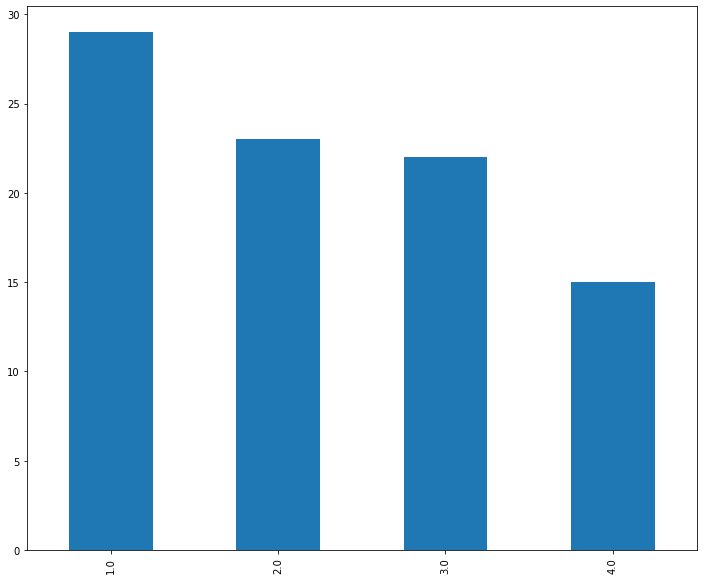

In [125]:
DFPurnamoota1['Transect Number'].value_counts().plot(kind='bar')

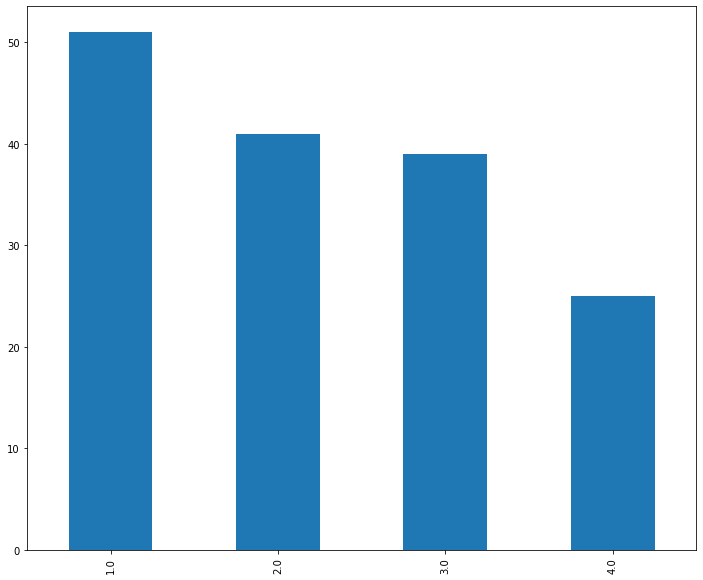

In [126]:
DFPurnamoota['Transect Number'].value_counts().plot(kind='bar')

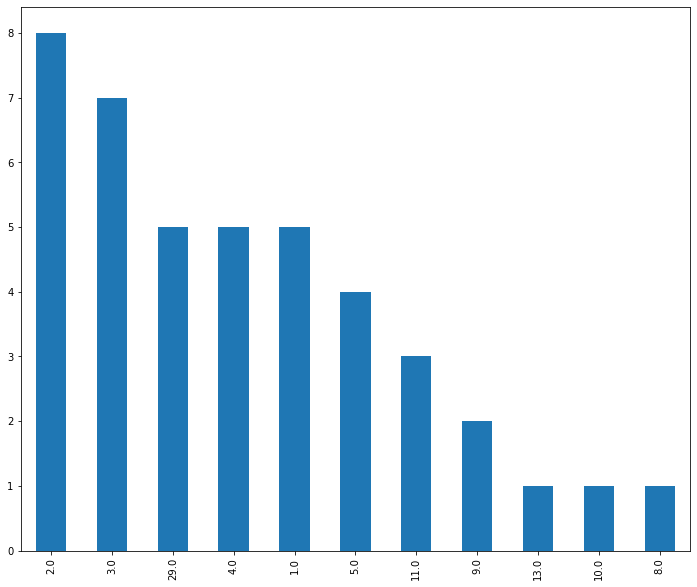

In [127]:
DFMutawintji1['Transect Number'].value_counts().plot(kind='bar')

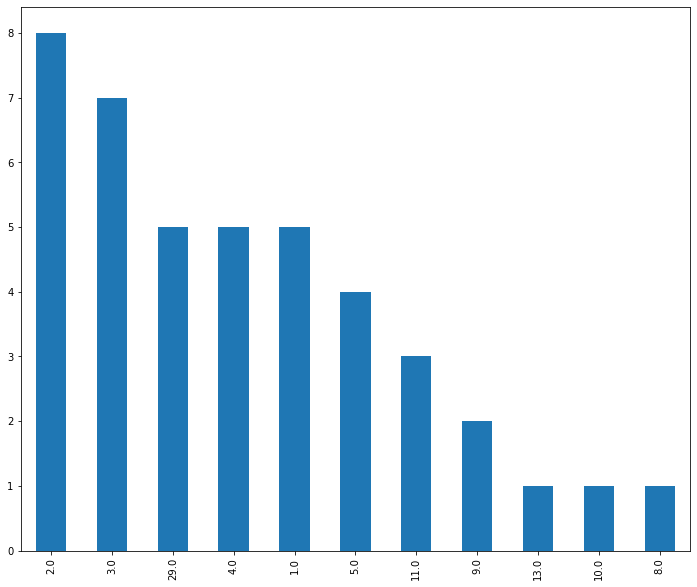

In [128]:
DFMutawintji['Transect Number'].value_counts().plot(kind='bar')

In [129]:
TransectNumDistMutawintji1  = cleaning(DFMutawintji1['Transect Number'], DFMutawintji['Transect Number'])

In [130]:
TransectNumDistMutawintji1 = pd.Series(TransectNumDistMutawintji1)

In [131]:
DFMutawintji['Transect Number'] = DFMutawintji['Transect Number'].fillna(value = TransectNumDistMutawintji1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
#DFMutawintji1['Transect Number'].values

In [133]:
TransectNumDistPurnamoota = cleaning(TransectLengthsP['Transect Number'], DFPurnamoota2['Transect Number'])
TransectNumDistPurnamoota.describe()

count    156.000000
mean      38.942308
std       44.024369
min        1.000000
25%        4.000000
50%       10.000000
75%       97.000000
max       99.000000
Name: Transect Number, dtype: float64

In [134]:
TransectNumDistPurnamoota = pd.Series(TransectNumDistPurnamoota)

In [135]:
DFPurnamoota2['Transect Number'] = DFPurnamoota2['Transect Number'].fillna(value = TransectNumDistPurnamoota)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
TransectNumDistMutawintji = cleaning(TransectLengthsM['Transect Number'], DFMutawintji2['Transect Number'])
TransectNumDistMutawintji.describe()

count    61.000000
mean      5.983607
std       6.551060
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max      29.000000
Name: Transect Number, dtype: float64

In [137]:
TransectNumDistMutawintji = pd.Series(TransectNumDistMutawintji)

In [138]:
DFMutawintji2['Transect Number'] = DFMutawintji2['Transect Number'].fillna(value = TransectNumDistMutawintji)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


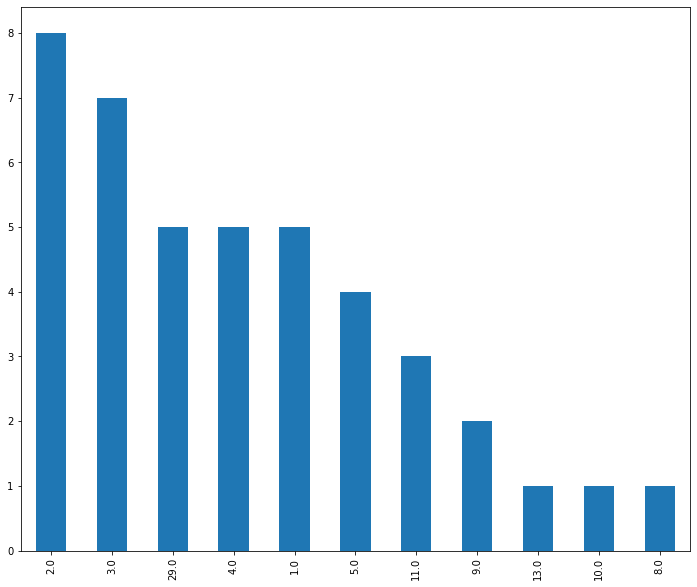

In [139]:
DFMutawintji1['Transect Number'].value_counts().plot(kind='bar')

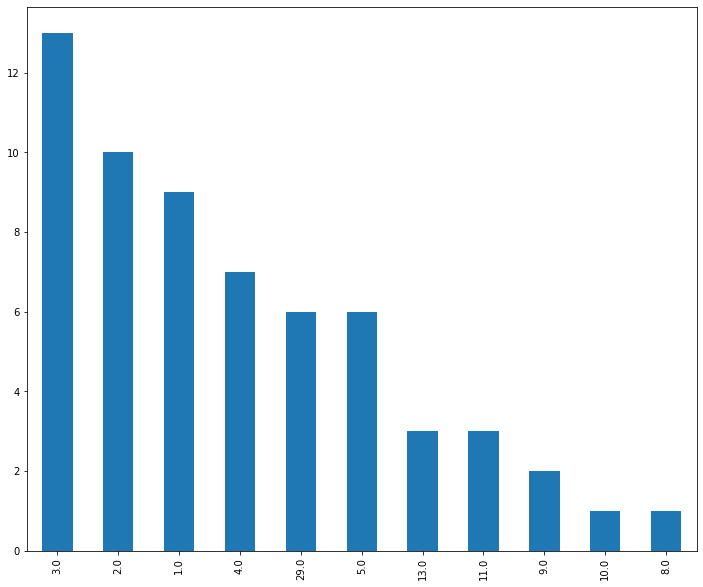

In [140]:
DFMutawintji2['Transect Number'].value_counts().plot(kind='bar')

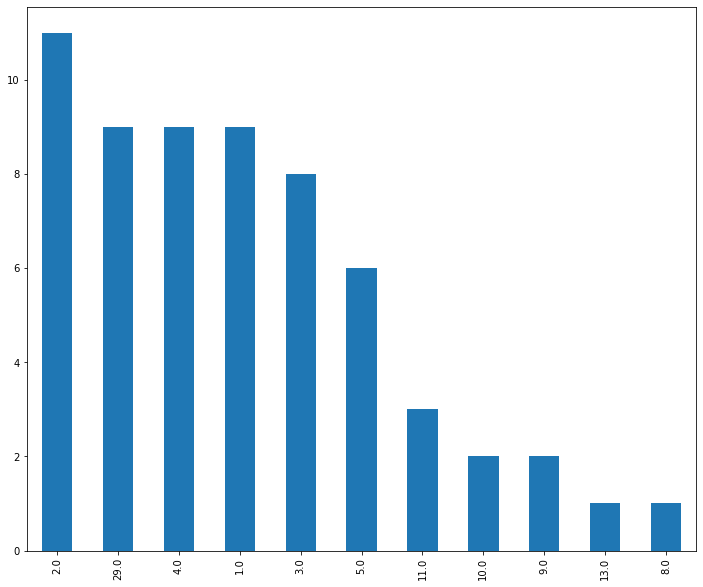

In [141]:
DFMutawintji['Transect Number'].value_counts().plot(kind='bar')

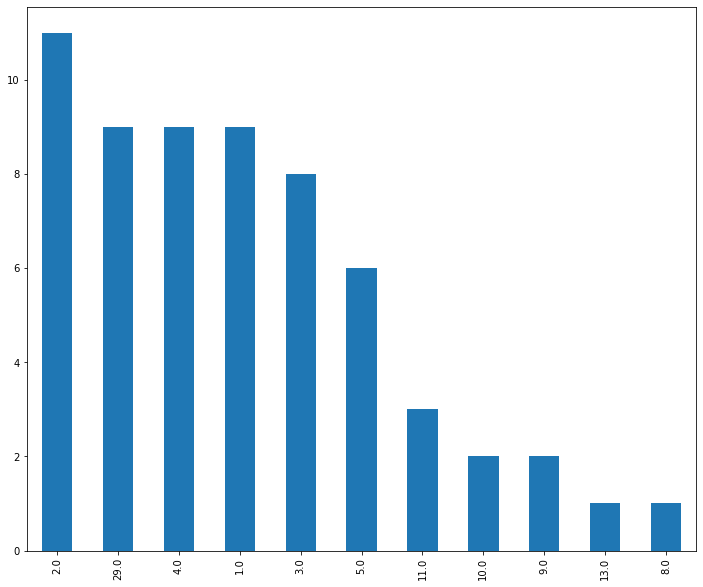

In [142]:
DFMutawintji['Transect Number'].value_counts().plot(kind='bar')

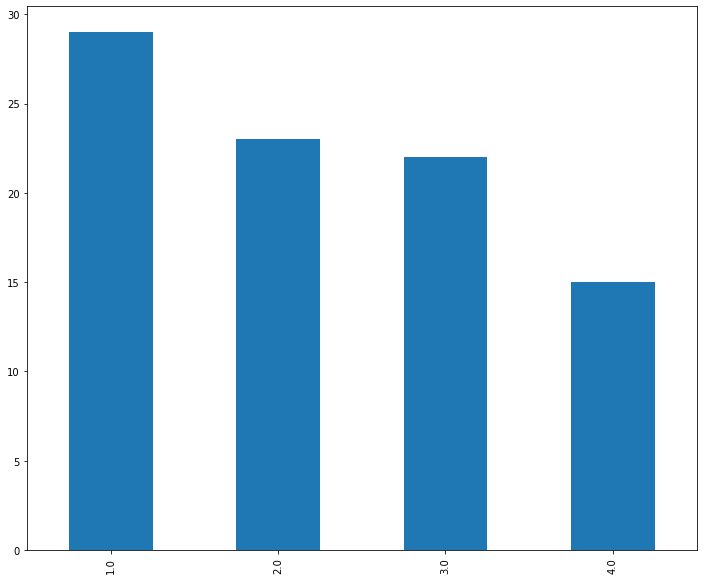

In [143]:
DFPurnamoota1['Transect Number'].value_counts().plot(kind='bar')

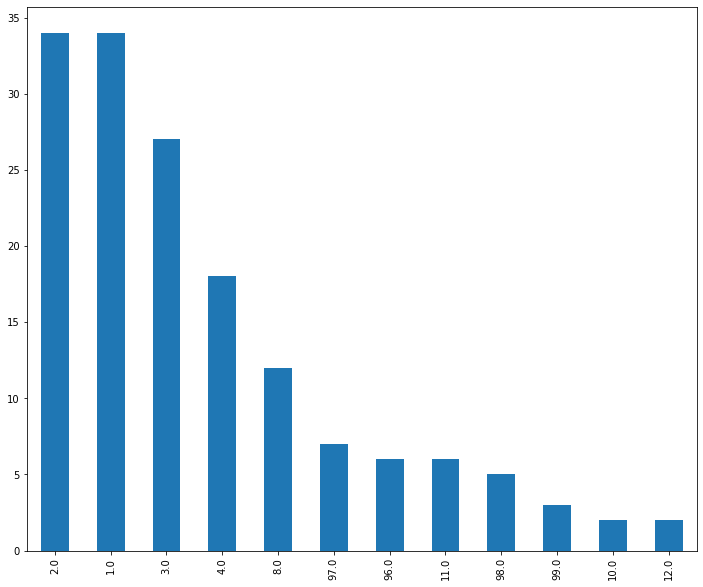

In [144]:
DFPurnamoota2['Transect Number'].value_counts().plot(kind='bar')

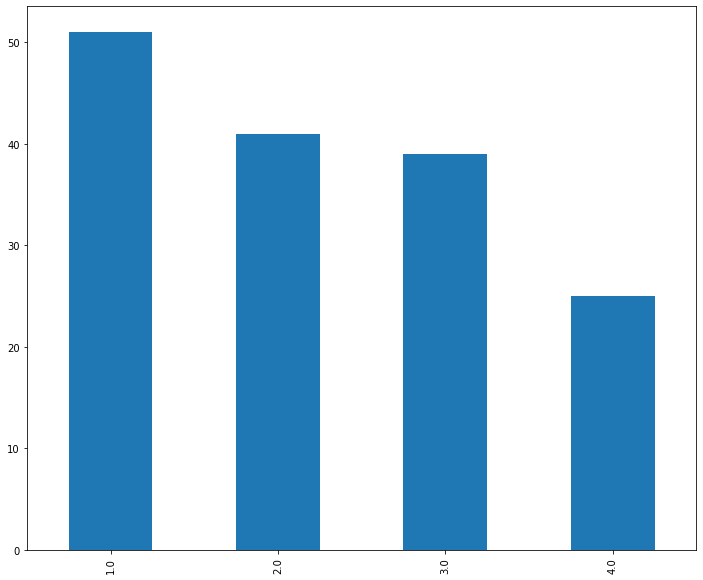

In [145]:
DFPurnamoota['Transect Number'].value_counts().plot(kind='bar')

In [146]:
PopEstMutawintji1 = DFMutawintji2.reset_index().groupby(["Date", "Transect Number"]).size().reset_index(name = "NumofAnimals")

In [147]:
PopEstPurnamoota1 = DFPurnamoota2.reset_index().groupby(["Date", "Transect Number"]).size().reset_index(name = "NumofAnimals")

In [148]:
PopEstMutawintji1

,Date,Transect Number,NumofAnimals
0,2013-12-06,1.0,2
1,2013-12-06,2.0,1
2,2013-12-06,9.0,2
3,2014-03-27,2.0,5
4,2014-03-27,3.0,4
5,2014-03-28,4.0,2
6,2014-03-28,5.0,3
7,2014-11-28,8.0,1
8,2014-11-28,10.0,1
9,2014-11-28,11.0,3


In [149]:
PopEstMutawintji = DFMutawintji.reset_index().groupby(["Date", "Transect Number"]).size().reset_index(name = "NumofAnimals")

In [150]:
PopEstPurnamoota = DFPurnamoota.reset_index().groupby(["Date", "Transect Number"]).size().reset_index(name = "NumofAnimals")

In [151]:
PopulationM1 =  PopEstMutawintji1.groupby(['Transect Number']).max().reset_index()

In [152]:
PopEstMutawintji

,Date,Transect Number,NumofAnimals
0,2013-12-06,1.0,2
1,2013-12-06,2.0,1
2,2013-12-06,9.0,2
3,2014-03-27,2.0,5
4,2014-03-27,3.0,4
5,2014-03-28,4.0,2
6,2014-03-28,5.0,3
7,2014-11-28,8.0,1
8,2014-11-28,10.0,1
9,2014-11-28,11.0,3


In [153]:
PopulationP1 =  PopEstPurnamoota1.groupby(['Transect Number']).max().reset_index()

In [154]:
PopulationP =  PopEstPurnamoota.groupby(['Transect Number']).max().reset_index()

In [155]:
PopulationM =  PopEstMutawintji.groupby(['Transect Number']).max().reset_index()

In [156]:
PopulationM1

,Transect Number,Date,NumofAnimals
0,1.0,2018-11-20,3
1,2.0,2018-11-20,5
2,3.0,2018-11-21,4
3,4.0,2018-11-20,2
4,5.0,2016-04-12,3
5,8.0,2014-11-28,1
6,9.0,2013-12-06,2
7,10.0,2014-11-28,1
8,11.0,2014-11-28,3
9,13.0,2016-04-12,1


In [157]:
PopulationM

,Transect Number,Date,NumofAnimals
0,1.0,2018-11-21,3
1,2.0,2018-11-20,5
2,3.0,2016-04-12,4
3,4.0,2018-11-20,3
4,5.0,2016-04-12,3
5,8.0,2014-11-28,1
6,9.0,2013-12-06,2
7,10.0,2016-04-11,1
8,11.0,2014-11-28,3
9,13.0,2015-03-31,1


In [158]:
PopulationP1

,Transect Number,Date,NumofAnimals
0,1.0,2016-04-14,14
1,2.0,2016-04-14,15
2,3.0,2015-11-30,8
3,4.0,2016-04-14,6
4,8.0,2016-04-13,9
5,10.0,2016-04-14,1
6,11.0,2016-04-14,3
7,12.0,2015-11-30,1
8,96.0,2016-04-14,3
9,97.0,2016-04-14,3


In [159]:
PopulationP

,Transect Number,Date,NumofAnimals
0,1.0,2016-04-14,14
1,2.0,2016-04-14,15
2,3.0,2016-04-14,8
3,4.0,2016-04-14,7


PopulationM1
with pd.ExcelWriter(r'C:\Users\Madhav Gulati\OneDrive\Discrepancy.xlsx') as writer:  
    PopulationM1.to_excel(writer, sheet_name='Mutawintji')
    PopulationP1.to_excel(writer, sheet_name='Purnamoota')

In [160]:
PopulationP1 = PopulationP1.merge(TransectLengthsP, on = 'Transect Number')

In [161]:
PopulationM1 = PopulationM1.merge(TransectLengthsM, on = 'Transect Number')

In [162]:
PopulationP = PopulationP.merge(TransectLengthsP, on = 'Transect Number')

In [163]:
PopulationM = PopulationM.merge(TransectLengthsM, on = 'Transect Number')

In [164]:
PopulationP1

,Transect Number,Date,NumofAnimals,Length (metres),Site
0,1.0,2016-04-14,14,622,Purnamoota
1,2.0,2016-04-14,15,657,Purnamoota
2,3.0,2015-11-30,8,545,Purnamoota
3,4.0,2016-04-14,6,608,Purnamoota
4,8.0,2016-04-13,9,312,Purnamoota
5,8.0,2016-04-13,9,372,Purnamoota
6,10.0,2016-04-14,1,793,Purnamoota
7,11.0,2016-04-14,3,704,Purnamoota
8,12.0,2015-11-30,1,480,Purnamoota
9,96.0,2016-04-14,3,418,Purnamoota


In [165]:
RegivenDF = pd.ExcelFile(r'C:\Users\Madhav Gulati\OneDrive\Regiven Dataset BRD.xlsx')
DFMutawintji3 = pd.read_excel(RegivenDF, 'Mutawintji')
DFPurnamoota3 = pd.read_excel(RegivenDF, 'Purnamoota')

In [166]:
PopEstMutawintji2 = DFMutawintji3.reset_index().groupby(["Date", "Transect Number"]).size().reset_index(name = "NumofAnimals")

In [167]:
PopEsPurnamoota2 = DFPurnamoota3.reset_index().groupby(["Date", "Transect Number"]).size().reset_index(name = "NumofAnimals")

In [168]:
PopulationM2 =  PopEstMutawintji2.groupby(['Transect Number']).max().reset_index()

In [169]:
PopulationP2 =  PopEsPurnamoota2.groupby(['Transect Number']).max().reset_index()

In [170]:
PopulationP2 = PopulationP2.merge(TransectLengthsP, on = 'Transect Number')

In [171]:
PopulationM2 = PopulationM2.merge(TransectLengthsM, on = 'Transect Number')

In [172]:
BRDDATA = pd.read_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD Project Area\Data\BRD Analysis.xlsx')

In [173]:
kde1 = stats.gaussian_kde(BRDDATA['Avg Distance'])

In [174]:
print('Probability of spotting an animal within 50m of range of the Transect Line for (Dataset 1) is ', kde1.integrate_box_1d( 50, np.inf))

Probability of spotting an animal within 50m of range of the Transect Line for (Dataset 1) is  0.0027408509510896406


In [175]:
#Calculating densities at 5m, 8m and 13.5 with probablities 0.4312840159806619, 0.25091642734913927, 0.08294490996520247


In [176]:
def density(col, col1, x, p):
    
    
    d = col1 / (col*float(x)*float(p)*2)
        
    return d
    

In [177]:
PopulationP2['Density at 5m'] = density(PopulationP2['Length (metres)'], PopulationP2['NumofAnimals'],5, 0.4312840159806619)

In [178]:
PopulationP1['Density at 5m'] = density(PopulationP1['Length (metres)'], PopulationP1['NumofAnimals'],5, 0.4312840159806619)

In [179]:
PopulationP['Density at 5m'] = density(PopulationP['Length (metres)'], PopulationP['NumofAnimals'],5, 0.4312840159806619)

In [180]:
PopulationM2['Density at 5m'] = density(PopulationM2['Length (metres)'], PopulationM2['NumofAnimals'],5, 0.4312840159806619)

In [181]:
PopulationM1['Density at 5m'] = density(PopulationM1['Length (metres)'], PopulationM1['NumofAnimals'],5, 0.4312840159806619)

In [182]:
PopulationM['Density at 5m'] = density(PopulationM['Length (metres)'], PopulationM['NumofAnimals'],5, 0.4312840159806619)

In [183]:
PopulationP2['Density at 8m'] = density(PopulationP2['Length (metres)'], PopulationP2['NumofAnimals'],8, 0.25091642734913927)

In [184]:
PopulationP1['Density at 8m'] = density(PopulationP1['Length (metres)'], PopulationP1['NumofAnimals'],8, 0.25091642734913927)

In [185]:
PopulationP['Density at 8m'] = density(PopulationP['Length (metres)'], PopulationP['NumofAnimals'],8, 0.25091642734913927)

In [186]:
PopulationM2['Density at 8m'] = density(PopulationM2['Length (metres)'], PopulationM2['NumofAnimals'],8, 0.25091642734913927)

In [187]:
PopulationM1['Density at 8m'] = density(PopulationM1['Length (metres)'], PopulationM1['NumofAnimals'],8, 0.25091642734913927)

In [188]:
PopulationM['Density at 8m'] = density(PopulationM['Length (metres)'], PopulationM['NumofAnimals'],8, 0.25091642734913927)

In [189]:
PopulationP2['Density at 13.5m'] = density(PopulationP2['Length (metres)'], PopulationP2['NumofAnimals'],13.5, 0.08294490996520247)

In [190]:
PopulationP1['Density at 13.5m'] = density(PopulationP1['Length (metres)'], PopulationP1['NumofAnimals'],13.5, 0.08294490996520247)

In [191]:
PopulationP['Density at 13.5m'] = density(PopulationP['Length (metres)'], PopulationP['NumofAnimals'],13.5, 0.08294490996520247)

In [192]:
PopulationM2['Density at 13.5m'] = density(PopulationM2['Length (metres)'], PopulationM2['NumofAnimals'],13.5, 0.08294490996520247)

In [193]:
PopulationM1['Density at 13.5m'] = density(PopulationM1['Length (metres)'], PopulationM1['NumofAnimals'],13.5, 0.08294490996520247)

In [194]:
PopulationM['Density at 13.5m'] = density(PopulationM['Length (metres)'], PopulationM['NumofAnimals'],13.5, 0.08294490996520247)

In [195]:
PopulationP2['Density at 50m'] = density(PopulationP2['Length (metres)'], PopulationP2['NumofAnimals'],50,0.0027408509510896406)

In [196]:
PopulationP1['Density at 50m'] = density(PopulationP1['Length (metres)'], PopulationP1['NumofAnimals'],50,0.0027408509510896406)

In [197]:
PopulationP['Density at 50m'] = density(PopulationP['Length (metres)'], PopulationP['NumofAnimals'],50,0.0027408509510896406)

In [198]:
PopulationM2['Density at 50m'] = density(PopulationM2['Length (metres)'], PopulationM2['NumofAnimals'],50,0.0027408509510896406)

In [199]:
PopulationM1['Density at 50m'] = density(PopulationM1['Length (metres)'], PopulationM1['NumofAnimals'],50,0.0027408509510896406)

In [200]:
PopulationM['Density at 50m'] = density(PopulationM['Length (metres)'], PopulationM['NumofAnimals'],50,0.0027408509510896406)

with pd.ExcelWriter(r'C:\Users\Madhav Gulati\OneDrive\Population Densities.xlsx') as writer:  
    PopulationM.to_excel(writer, sheet_name='Mutawintji')
    PopulationP.to_excel(writer, sheet_name='Purnamoota')
    PopulationM1.to_excel(writer, sheet_name='Mutawintji1')
    PopulationP1.to_excel(writer, sheet_name='Purnamoota1')
    PopulationM2.to_excel(writer, sheet_name='Mutawintji2')
    PopulationP2.to_excel(writer, sheet_name='Purnamoota2')